# Datensets erstellen

Nachdem ein ersten Eindruck von den Daten verschafft und entschieden wurde, wie mit fehlenden Daten umgegangen wird, werden die Daten in einzelne Datensets aufgesplittet. 

**Warum ist eine Aufsplittung notwendig?** 

Beispiel:
Familie Maier lebt mit Katze Felix in einem Haus. Die Katze bringt immer häufiger lebende Beute, meist Mäuse, mit ins Haus. Herr Maier ist ein Tierliebhaber, aber Mäuse möchte er nicht im Haus haben. Er hat eine Idee: Mit einem KI-System möchte er eine Katzenklappe entwickeln, die Katzen nur dann hinein lässt, wenn die Katze keine Beute mitbringt. Zunächst installiert er eine Kamera, sammelt 1000 Bilder und weist die Bilder manuell 4 Kategorien zu:
1. keine Katze (350 Bilder)
2. Felix von vorne (300 Bilder)
3. Felix von hinten (300 Bilder)
4. Felix mit Beute von vorne (50 Bilder)

```{figure} ../images/catflap.jpg
---
height: 350px
align: left
name: fig-catflap
---
```
<div style="font-size: 8px;">Quelle: Andreas Göllner auf Pixabay</div>

Als Standardfall (Kategorien 1-3) soll die Katzenklappe offen sein. Die Bilder der Kategorien 1-3 erhalten das Label "offen". Wenn Felix mit einer Beute vor der Katzenklappe steht (Kategorie 4), soll diese verriegelt werden. Die Kategorie 4 Bilder werden mit dem Label "zu" versehen. Herr Maier trainiert ein Machine Learning-Modell mit den 1000 Bildern und entsprechenden Labeln. Anschließend prüft er das trainierte Modell mit ingesamt 80 von den 1000 Bildern (40 mit dem Label "offen" und 40 mit dem Label "gesperrt". Alle 40 Bilder werden richtig erkannt. Herr Meier ist begeistert und nimmt das System in Betrieb. Am nächsten Morgen wird Herr Meier von einer Maus in der Küche begrüßt. 

**Was ist passiert?**

Herr Maier hat mit den gleichen Bildern getestet, mit denen er auch das Modell trainiert hat. Das Modell hat die Bilder mit entsprechendem Label bereits gesehen und konnte so mit 100% Genauigkeit, alle Bilder richtig klassifizieren. Neue Bilder, der letzten Nacht, wurden falsch klassifiziert. Das Modell war also noch nicht gut genug um im Praxiseinsatz den Erwartungen zu entsprechen. 

```{Attention}
Wichtig: Verwenden Sie nie Daten in der Testphase, die bereits für das Training verwendet wurden.
```

Herr Maier erstellt ein Testdatendset. Hierzu nimmt er neue Bilder auf und weißt manuell die Labels zu. Mit diesen neuen Bildern (50 mit dem Label "offen" und 50 mit dem Label "gesperrt") wird getestet. Es stellt sich heraus, dass die Erkennungsrate lediglich bei 70% liegt. Eine Erkennungsrate von 70% bedeutet, dass 70 von 100 Bilder richtig erkannt werden. Herr Meier vermutet, dass die Anzahl der Bilder für das Training nicht ausreichen. Es werden weitere 1000 Beispiel-Bilder erstellt. Es liegen jetzt 2000 Bilder folgender Kategorien für das Training vor:

1. keine Katze (600 Bilder), Label "offen"
2. Felix von vorne (600 Bilder), Label "offen"
3. Felix von hinten (600 Bilder), Label "offen"
4. Felix mit Beute von vorne (200 Bilder), Label "gesperrt"

Anschließend testet Herr Maier erneut mit dem erstellten Testdatenset. Das Ergebnis liegt jetzt bei einer Erkennungsrate von 90%. Damit ist Herr Maier zufrieden und nimmt das Modell erneut in Betrieb. Einige Wochen hat Herr Maier Ruhe vor ungewünschten Beutetieren in der Wohnung. Hin und wieder kommt es jedoch vor, dass eine Fehlentscheidung vom System getroffen wird, ca. wie erwartet sind 10% der Klassifikationen fehlerhaft. Herr Maier möchte das Modell weiter verbessern. Dieses Mal versucht er die Hyperparameter des Modells zu verbessern. Im Gegensatz zu Parameter eines Modells, die während der Trainingsphase gelernt werden, sind Hyperparameter, Parameter, die Einstellungen am Algorithmus selbst erlauben. Im Fall des eingesetzten Neuronalen Netz, experimentiert Herr Maier mit der Netzarchitektur (Anzahl der Hidden Layer und die Lernrate werden variiert). Die Optimierungsversuche werden in mehreren hundert Versuchsläufen angepasst und mit dem Testdatenset getestet. Die Erkennungsrate beträgt nach der Optimierung 97%. Herr Maier ist zufrieden und nimmt das optimierte System in Betrieb. Die Enttäuschung ist groß, als in den folgenden Tagen wieder häufiger Mäuse in der Wohnung sind. 

**Wie kann es sein, dass die Erkennungsrate von 90% auf 97% gestiegen ist und das Modell wesentlich schlechter im Betrieb abschneidet?**

Die Hyperparameter wurden für das Testset optimiert. Es handelt sich in diesem Fall um eine Überanpassung an das Testdatenset, auch Overfitting genannt. In jedem der Versuchsläufe wurde das gleiche Testdatenset verwendet und anschließend optimiert. Besser ist es, wenn ein weiteres Datenset erstellt wird, das für Optimierungsversuche der Hyperparameter verwendet wird. Dieses Datenset wird **Validierungsdatenset** genannt. Das Testdatenset wird nach Abschluss der Optimierungen einmalig verwendet um das Modell abschließend zu prüfen. So kann Overfitting rechtzeitig vor in Betrieb nahme erkannt werden.



```{Attention}
Wichtig: Verwenden Sie ein Validierungsset, wenn Sie häufige Optimierungen auf Basis des Testergebnis vornehmen.
```

## Trainings-, Validierungs- und Testdatenset

Für die Entwicklung von Machine Learning Verfahren werden drei Datensets erstellt:
* Trainigsdatenset
* Validierungsdatenset
* Testdatenset

Das **Trainingsdatenset** wird zum trainieren des Modells verwednet. Trainieren bedeutet, dass aus Erfahrung (Daten) gelernt wird.

Das **Validierungsdatenset** wird verwendet, um das Modell während des Entwicklungsprozesses in mehreren Iterationen zu prüfen. Auf Basis des Ergebnisses werden Optimierungen wie z.B. die Anpassung von Hyperparameter vorgenommen und anschließend erneut mit dem Validierungsset geprüft. 

Bevor ein Modell in Betrieb genommen werden kann, findet abschließend eine Prüfung mit dem **Testdatenset** statt. Das Ergebnis des Testdatensets sollte nicht verwendet werden, um Optimierungen durchzuführen. Ist das Ergebnis des Validierungsdatensets signifikant besser als das Ergebnis des Trainingsdatensets liegt mit hoher Wahrscheinlichkeit eine Überanpassung (Overfitting) des Modells vor.

### Wissen prüfen

Eine Validierungsdatenset ist notwendig wenn

```{dropdown} sehr wenige Daten vorliegen
<font color='red'>Falsch.</font>
```
```{dropdown} es viele Hyperparameter gibt, die angepasst werden müssen
<font color='green'>Richtig.</font>
```
```{dropdown} ein komplexes Modell gelernt werden soll, also viele Modelparameter gelernt werden müssen
<font color='red'>Falsch.</font>
```

Testdaten dürfen

```{dropdown} für die Optimierung der Hyperparameter und für das Training verwendet werden
<font color='red'>Falsch.</font>
```
```{dropdown} für das Training und das Testen verwendet werden
<font color='red'>Falsch.</font>
```
```{dropdown} ausschließlich für das Testen verwendet werden
<font color='green'>Richtig.</font>
```

Was bedeutet Überanpassung (Overfitting)?

```{dropdown} Das Modell ist zu allgemein.
<font color='red'>Falsch.</font>
```
```{dropdown} Das Modell wurde zu sehr für die Trainingsdaten optimiert.
<font color='green'>Richtig.</font>
```
```{dropdown} Das Modell liefert im Betrieb bessere Ergebnisse als in der Testphase.
<font color='red'>Falsch.</font>
```

## Was sollte bei der Erstellung der Datansets beachtet werden?
* Datensets müssen disjunkt sein
* Geeignete Größe der Datensets wählen
* Datensets sollten wenn möglich balanciert sein
* Ähnlichkeit zu Daten im Betrieb

### Datensets müssen disjunkt sein

Wie bereits ausführlich am Beispiel Katzenklappe erläutert, ist es enorm wichtig, dass sich die Datensets nicht überschneiden. Achten Sie besonders darauf, dass sie nie die Testdaten zum trainieren des Modells verwenden.

```{figure} ../images/datasplitDisjunkt.png
---
width: 550px
align: left
name: fig-split-disjunkt
---
```

```{Note}
Nicht disjunkte Datensets kommen in der Praxis häufiger vor als man annimmt. Meist sind es Flüchtigkeitsfehler. Die Auswirkung ist jedoch enorm. 
````

### Geeignete Größe der Datensets wählen

Wieviel Prozent der Daten sollten als Trainings-, Validierungs- und Testdaten verwendet werden? Wie bei den meisten Entscheidungen im Machine Learning Bereich hängt auch in diesem Fall eine gute Entscheidung vom Anwendungsfall ab. Eine grobe Richtlinie und Empfehlung lautet:
* 60% der Daten als Trainingsdaten
* 20% der Daten als Validierungsdaten
* 20% der Daten als Testdaten


```{figure} ../images/datasplitTvtDist.png
---
height: 150px
align: left
name: fig-split-dist
---
```

Zum Beispiel kann bei sehr vielen verfügbaren Datensätzen z.B. > 100000 eine geringere Validierungs- und Trainingsmenge ausreichen. Eine Mögliche Verteilung kann 90% Training, 5% Validierung, 5% Test lauten. Wichtig ist, dass in den Validierungs- und Testdatensets möglichst alle Varianten enthalten sind und den in der Realität vorkommenden Daten ähnlich sind. Im Fall der Katzenklappen-Anwendung ist es wichtig, dass möglichst unterschiedliche Bilder von den unterschiedlichen Situationen (Katze von vorne, Katze von hinten, keine Katze, Katze mit Beute) und unterschiedliche Belichtungen, wie z.B. in der Dämmerung, Nachts, bei Tag etc. enthalten sind.

### Datensets sollten wenn möglich balanciert sein

Was bedeutet in Kontext von Machine Learning "balancierte Datensets"?
Schauen wir uns noch einmal das Katzenklappen-Beispiel an. Es handelt sich bei diesem Anwendungsfall um eine Klassifikation. Es soll ein Modell gelernt werden, dass als Eingabe ein Bild erhält und als Ausgabe eine der beiden Klassen "offen" oder "gesperrt" ausgibt. Wobei "offen" und "gesperrt" die Zustände sind, die aufgrund der Klassifikation erfolgen sollen. Zu Beginn liegen 950 Bilder mit dem Label "offen" vor und nur 50 Bilder mit dem Label "gesperrt". Es handelt sich in diesem Fall um eine Menge von Daten, die entsprechend der Anzahl der verfügbaren Bilder pro Klasse nicht "balanciert sind". 

```{figure} ../images/datasplitImbalanced.png
---
width: 350px
align: left
name: fig-imbalanced
---
```

Ein vollständig balancierte Datenmenge liegt vor, wenn von 1000 verfügbaren Bildern, 500 mit dem Label "offen" versehen sind und 500 mit dem Label "gesperrt". Balanciert bedeutet also, es liegt eine Gleichverteilung vor.

Balancierte Datensets führen meist zu einem besseren Ergebnis. Zunächst sollte man prüfen ob sich die Datenmenge aus der die Datensets erstellt werden balanciert ist. Handelt es sich um keine balancierte Datenmenge, sollte versucht werden eine balancierte Datenmenge zu erhalten. Wenn genug Daten vorliegen, können Teilmengen ausgewählt werden. Wenn wenig Daten vorliegen, kann eine weitere Datenerhebung sinnvoll sein. Im Fall der Katzenklappen-Anwendung könnte die Anzahl der "Katze mit Beute"-Bilder erhöht werden, durch weitere Aufzeichnungen. 

Nicht balancierte Datensets kommen in der Praxis sehr häufig vor. Lässt sich die Verteilung der Daten nicht ändern, kann mit nicht balancierten Datenset ein Testlauf gestartet werden. Bei der Bewertung des Ergebnisse muss diese Eigenschaft des Datensets berücksichtigt werden.

<mark> todo </mark>möglichkeiten bei inbalanced (optional)

```{Tip}
Achten Sie bei der Aufteilung der Datensets auf die Verteilung der Daten. Erstellen sie wenn möglich Datensets die balanciert sind.
````

### Ähnlichkeit zu Daten im Betrieb

Die Charakteristiken der Trainings-, Validierungs- und Testdatensets sollten möglichst ähnliche zu den Charakteristiken der Daten im Betrieb sein. Die Verteilng der Anzahl pro Klasse sind eine Charakteristik. Je nach Anwendungsfall gibt es weitere Charakteristiken.

Am Beispiel der Katzenklappe: Es existieren meherere Bilder mit der gleichen Beute in den Daten. Wenn man die Zuweisung der Datensätze in die jeweiligen Datensets beliebig erstellt, kann es sein, dass Bilder der gleichen Beute im Trainings- als auch im Testset enthalten sind. Das hat zur Folge, dass das Modell die Beute bereits im Training gesehen hat. Die Beute, die Felix in Zukunft mitbringen wird, hat das Modell noch nicht gesehen. Der Unterschied von der Test-Situation und der Realität (im Betrieb), weicht stark ab. Das Ergebnis unter Verwendung der Testdaten wird besser sein, als das Ergebnis im Betrieb.

```{figure} ../images/datasplitTimeCatflap.png
---
width: 650px
align: left
name: fig-time-catflap
---
```

Lösung: Die Daten werden nicht beliebig gesplittet, sondern nach Aufnahmedatum sortiert und anschließend gesplittet. So wird die Wahrscheinlichkeit, dass ein Beutebild auch im Testset existiert minimiert. 

```{Tip}
Denken Sie über das Szenario im Betrieb nach: 
* Welche Daten stehen dem Modell zum Training zur Verfügung?
* Welche Daten werden im Betrieb erzeugt, bzw. als Anfrage an das Modell gestellt? 
* Wie unterscheiden sich die Daten in Training und Betrieb? 
* Spiegelt sich diese Unterscheidung auch im Trainings- und Testdatenset wieder?
````

## Beispiel Titanic: Datensets erstellen

Packete importieren

In [1]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import pickle
from sklearn.model_selection import train_test_split

Daten laden

In [2]:
df = pd.read_pickle('../output/titanic/preparedData.pkl')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Sind die Daten ungleich verteilt in Bezug auf die Anzahl der Klassen?

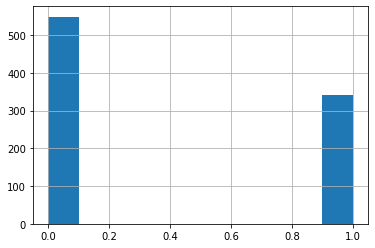

In [3]:
df['Survived'].hist()

Vorbereitung für die Erstellung der Datensets mit Scikit-Learn Bibliothek:
1. Pandas Dataframe der Merkmale enthält
2. Pandas Dataframe (Series) der Labels enthält

In [4]:
X = df.drop(['Survived'], axis=1)

In [5]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [6]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Estellen der Datensets unter Verwendung der train_test_split-Methode von Scikit-Learn. Ziel ist es, die Daten in 80% Trainingsdaten, 20% Validierungsdaten und 20% Testdaten zu teilen. Das erfolgt mit der train_test_split-Methode in zwei Schritten:
1. Die Daten werden im Verhältnis 80:20 gesplittet. 80% der Daten werden als Trainingsdaten bezeichnet, 20% der Daten als Testdaten. 
2. Die Trainingsdaten werden nochmals geteilt. 75% werden weiterhin als Trainingsdaten verwendet, 25% als Validierungsdaten.

Der Paramter **random_state** wird auf einen beliebigen Wert (hier 1) festgelegt. Wird ein Wert für diesen Parameter gesetzt erhält man bei jeder Ausführung des Codes die gleiche Aufteilung. Konkret bedeutet das, wenn der erste Datensatz bei einer Ausführung des Codes dem Testdatensatz zugewiesen wird, ist das auch bei der zweiten Ausführung der Fall. Diese Einstellung wird verwendet um das Ergebnis reproduzieren zu können.

Dem Parameter **stratify** werden die Labels übergeben. Damit wird sichergestellt, dass die Datensets die gleiche Verteilung in Bezug auf die Klassen enthalten. In diesem Fall sind es 0.61% der Daten mit dem Label "nicht überlebt" und 0.39% der Daten mit dem Label "überlebt".

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

In [8]:
print('Trainingsdatenset:')
print('Shape of X_train ',X_train.shape)
print('Shape of y_train ',y_train.shape)
print()
print('Validierungsdatenset:') 
print('Shape of X_val ',X_val.shape)
print('Shape of y_val ',y_val.shape)
print()
print('Testdatenset:')
print('Shape of X_test ',X_test.shape)
print('Shape of y_test ',y_test.shape)

Trainingsdatenset:
Shape of X_train  (534, 7)
Shape of y_train  (534,)

Validierungsdatenset:
Shape of X_val  (178, 7)
Shape of y_val  (178,)

Testdatenset:
Shape of X_test  (179, 7)
Shape of y_test  (179,)


Verteilung der Klassen im Trainingsdatenset

In [9]:
y_train.value_counts()/y_train.shape[0]

0    0.616105
1    0.383895
Name: Survived, dtype: float64

Verteilung der Klassen im Validierungsdatenset

In [10]:
y_val.value_counts()/y_val.shape[0]

0    0.617978
1    0.382022
Name: Survived, dtype: float64

Verteilung der Klassen im Testdatenset

In [11]:
y_test.value_counts()/y_test.shape[0]

0    0.614525
1    0.385475
Name: Survived, dtype: float64

## Datensets speichern

Die Datensets werden in einem Python Dictionary abgelegt.

In [12]:
datasets = {
    'X_train': X_train,
    'y_train': y_train,
    'X_val': X_val,
    'y_val': y_val,
    'X_test': X_test,
    'y_test': y_test
}

In [13]:
import random
random.seed(52)

# Sex
sex_values = ['female', 'male']

# Pclass
pclass_values = [1, 2, 3]

# Embarked
embarked_values = ['Q','S','C']
# Survived
survived_values = [0,1]

outlier_xtrain_count = int(datasets['X_train'].shape[0]*0.02)
outlier_xval_count = int(datasets['X_val'].shape[0]*0.02)
outlier_xtest_count = int(datasets['X_test'].shape[0]*0.02)

outlier = {
    'X_train': {
        'age': random.sample(range(200,300), outlier_xtrain_count),
        'parch': random.sample(range(20,40), outlier_xtrain_count),
        'sibsp': random.sample(range(21,50), outlier_xtrain_count),
        'fare': [2630]*outlier_xtrain_count
    },
    'X_val': {
        'age': random.sample(range(200,300), outlier_xval_count),
        'parch': random.sample(range(20,40), outlier_xval_count),
        'sibsp': random.sample(range(21,50), outlier_xval_count),
        'fare': [2630]*outlier_xval_count
    },
    'X_test': {
        'age': random.sample(range(200,300), outlier_xtest_count),
        'parch': random.sample(range(20,40), outlier_xtest_count),
        'sibsp': random.sample(range(21,50), outlier_xtest_count),
        'fare': [2630]*outlier_xtest_count
    }
}

print(outlier['X_train']['age'])
print(outlier['X_val']['age'])

[234, 206, 292, 265, 261, 247, 252, 204, 217, 220]
[253, 215, 204]


In [14]:
for key, dataset in datasets.items():
    print(key, dataset.shape)

X_train (534, 7)
y_train (534,)
X_val (178, 7)
y_val (178,)
X_test (179, 7)
y_test (179,)


In [15]:
for key, dataset in datasets.items():
    y_train_new = []
    if 'X' in key:
        for (age, sibsp, parch, fare) in zip(outlier[key]['age'], outlier[key]['sibsp'], outlier[key]['parch'], outlier[key]['fare']):
            dataset = dataset.append(
                {
                    'Sex': random.choice(sex_values),
                    'Pclass': random.choice(pclass_values),
                    'Age': age,
                    'Parch': parch,
                    'SibSp': sibsp,
                    'Fare': fare,
                    'Embarked': random.choice(embarked_values)
                }, ignore_index=True
            )
            y_train_new.append(random.choice(survived_values))

        y_set = 'y_'+key.split('_')[1]
        datasets[y_set] = datasets[y_set].append(pd.Series(y_train_new))
        datasets[key] = dataset

In [16]:
for key, dataset in datasets.items():
    print(key, dataset.shape)

X_train (544, 7)
y_train (544,)
X_val (181, 7)
y_val (181,)
X_test (182, 7)
y_test (182,)


Das Pickle Modul ermöglicht eine einfache und effiziente Speicherung der Daten. Im Vergleich zu anderen Formaten wie z.B. dem Excel-Format, lassen sich Pickle Formate schneller speichern und auslesen. Das Speichern des Python Dictionary erfolgt über folgende zwei Zeilen Code:

In [17]:
with open('../output/titanic/datasets.pkl', 'wb') as handle:
    pickle.dump(datasets, handle)

Über folgende Befehle lässt sich das Dictionary wieder auslesen:

In [18]:
with open('../output/titanic/datasets.pkl', 'rb') as handle:
    datasets = pickle.load(handle)

Die Ausgabe der Merkmale des Trainingsdatenset erfolgt über den Key "X_train" des eingelesenen Dictionaries.

In [19]:
datasets['X_test']

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,male,59.0,0,0,13.5000,S
1,1,male,65.0,0,1,61.9792,C
2,2,male,28.0,0,0,0.0000,S
3,2,male,18.0,0,0,73.5000,S
4,3,male,25.0,0,0,7.6500,S
...,...,...,...,...,...,...,...
177,3,male,70.5,0,0,7.7500,Q
178,3,female,28.0,3,1,25.4667,S
179,3,female,246.0,42,24,2630.0000,C
180,1,female,269.0,37,32,2630.0000,S


-----------------

Speichern der Datensets

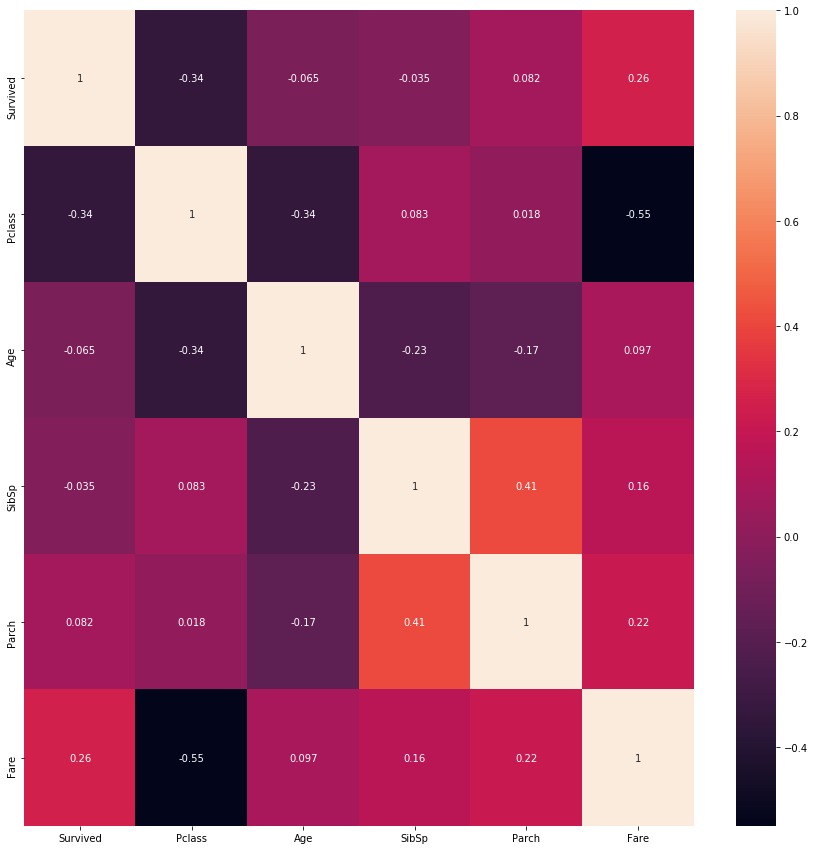

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

Für die Entwicklung von Machine Learning Verfahren sollten 3 Datensets erstellt werden:
* Trainigsdatenset
* Validierungsdatenset
* Testdatenset

In der Trainingsphase wird ein Modell trainiert. Trainieren bedeutet, dass aus Erfahrung (Daten) gelernt wird. In der Testphase wird das trainierte Modell geprüft. Hierzu werden neue Daten verwendet, die nicht in der Trainingsphase zum Einsatz kamen. In der Testphase erfolgt eine Beurteilung, ob das trainierte Modell den Erwartungen entsprechend funktioniert, umgangssprachlich "gut genug ist". Ist das System nicht gut genug muss das System angepasst werden, erneut die Trainingsphase durchlaufen und anschließend getestet werden. Ist das System gut genug, kann in die Betriebsphase gewechselt werden. Das Modell geht "in Betrieb", bedeutet es wird in der Endanwendung eingesetzt.

Für die Trainings- und Testphase werden also Daten benötigt. Wichtig ist, dass Daten, die für das Training verwendet werden, in keinem Fall in der Testphase verwendet werden. Die vorhandenen Daten werden in zwei Datensets aufgeteilt werden, wobei die Datensets disjunkt sein müsssen. Disjunkt bedeutet, dass sich die Datensets nicht überschneiden.

In der Praxis wird häufig noch eine Validierungsphase durchlaufen. Eine Validierungsphase ist dann notwendig, wenn es viele Hyperparamter gibt, die angepasst werden müssen. Im Gegensatz zu Parameter eines Modells, die während der Trainingsphase gelernt werden, sind Hyperparameter, Parameter, die Einstellungen am Algorithmus selbst erlauben. Wird das Ergebnis der Testphase verwendet um Hyperparameter anzupassen, ist es sinnvoll eine Validierungsphase vor der Testphase einzubauen. Die Validierungsphase wird dann verwendet um die optimale Einstellung der Hyperparamter zu finden. Sind die Einstellungen nach mehrmaligem Durchlauf gefunden, wird ein abschließender Test in der Testphase durchgeführt. In diesem Fall werden drei disjunkte Datensets benötigt. 

Da in diesem Workshop, der Fokus auf die Datenaufbereitung, -transformation und -verständnis liegen, und nicht auf der Optimierung der Hyperparameter eines Machine Learning Modells, werden aus Komplexitätsgründen nur ein Trainings- und Testdatenset verwendet.